<a href="https://colab.research.google.com/github/awaisnazir08/Squash-Ball-Detection/blob/main/Ball_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jun  6 10:48:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [5]:
!unrar x "/content/drive/My Drive/Squash_Ball_Tracking/Squash_Ball_Dataset.rar"

Streaming output truncated to the last 5000 lines.
Extracting  Squash_Ball_Dataset/train/labels/frame_100403_jpg.rf.2767142dc57f32912774b224cd5a477a.txt      87%  OK 
Extracting  Squash_Ball_Dataset/train/labels/frame_100403_jpg.rf.6a751e7d493f473f62d220e972a9d7fc.txt      87%  OK 
Extracting  Squash_Ball_Dataset/train/labels/frame_100403_jpg.rf.76bc2bcfa38e14efdabe3f0c727a6366.txt      87%  OK 
Extracting  Squash_Ball_Dataset/train/labels/frame_100403_jpg.rf.d36c736602a2823d2001ad66f6ad0796.txt      87%  OK 
Extracting  Squash_Ball_Dataset/train/labels/frame_100403_jpg.rf.f18a8973930a7e0416fb295ffeef53ea.txt      87%  OK 
Extracting  Squash_Ball_Dataset/train/labels/frame_100403_jpg.rf.f5cdae8a73366d8aacf0b9921e6703f6.txt      87%  OK 
Extracting  Squash_Ball_Dataset/train/labels/frame_100404_jpg.rf.0d0968edfe1f291b60c25a446ebc0d8d.txt      87%  OK 
Extracting  Squash_Ball_Dataset/train/labels/frame_100404_jpg.rf.3e7d65d4b

In [6]:
data_yaml_content = """
train: /content/Squash_Ball_Dataset/train/images
val: /content/Squash_Ball_Dataset/validation/images
test: /content/Squash_Ball_Dataset/test/images

nc: 1  # Number of classes
names: ['ball']  # List of class names
"""

# Write to a file
with open('/content/data.yaml', 'w') as f:
    f.write(data_yaml_content)

In [7]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [8]:
%cd {HOME}

/content


In [9]:
from IPython import display
from IPython.display import Image
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.8/78.2 GB disk)


In [10]:
from ultralytics import YOLO


In [13]:
# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

In [14]:
# Train the model
model.train(data='/content/data.yaml', epochs=25, imgsz=640, batch=16)


New https://pypi.org/project/ultralytics/8.2.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nm

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7abc8a6782e0>
fitness: 0.13079317511471433
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.10451])
names: {0: 'ball'}
plot: True
results_dict: {'metrics/precision(B)': 0.46139252727212526, 'metrics/recall(B)': 0.49612403100775193, 'metrics/mAP50(B)': 0.36734300855531715, 'metrics/mAP50-95(B)': 0.10450986028798068, 'fitness': 0.13079317511471433}
save_dir: PosixPath('runs/detect/train2')
speed: {'preprocess': 0.27877350491801584, 'inference': 2.242616546435619, 'loss': 0.0011733197790431225, 'postprocess': 2.86952013105858}

In [15]:
# Validate the model
metrics = model.val(data='/content/data.yaml')


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Squash_Ball_Dataset/validation/labels.cache... 1016 images, 500 backgrounds, 0 corrupt: 100%|██████████| 1016/1016 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.89it/s]
                   all       1016        516      0.472      0.508      0.378      0.105
Speed: 0.4ms preprocess, 4.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val


In [38]:
# Evaluate the model on the test set
# results = model.predict(data='/content/data.yaml')
results = model.predict(source='/content/Squash_Ball_Dataset/test/images', save_txt=True, save_conf=True, save=True, conf=0.001, iou=0.6, imgsz=800)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1860 /content/Squash_Ball_Dataset/test/images/frame_100000_jpg.rf.9a3a41e50913c3560cbbdc681d90c25e.jpg: 800x800 38 balls, 166.5ms
image 2/1860 /content/Squash_Ball_Dataset/test/images/frame_100000_jpg.rf.e4268647578611cb9f26b9c10b7b4d61.jpg: 800x800 117 balls, 10.3ms
image 3/1860 /content/Squash_Ball_Dataset/test/images/frame_100001_jpg.rf.44a5d57ad3b29e11c53efa0d6bac0c67.jpg: 800x800 38 balls, 14.4ms
image 4/1860 /content/Squash_Ball_Dataset/t

In [42]:
# Save the trained model
import torch
torch.save(model.state_dict(), 'yolov8_model.pt')
# torch.save(model, '/content/runs/train2/weights/best.pt')

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

/content


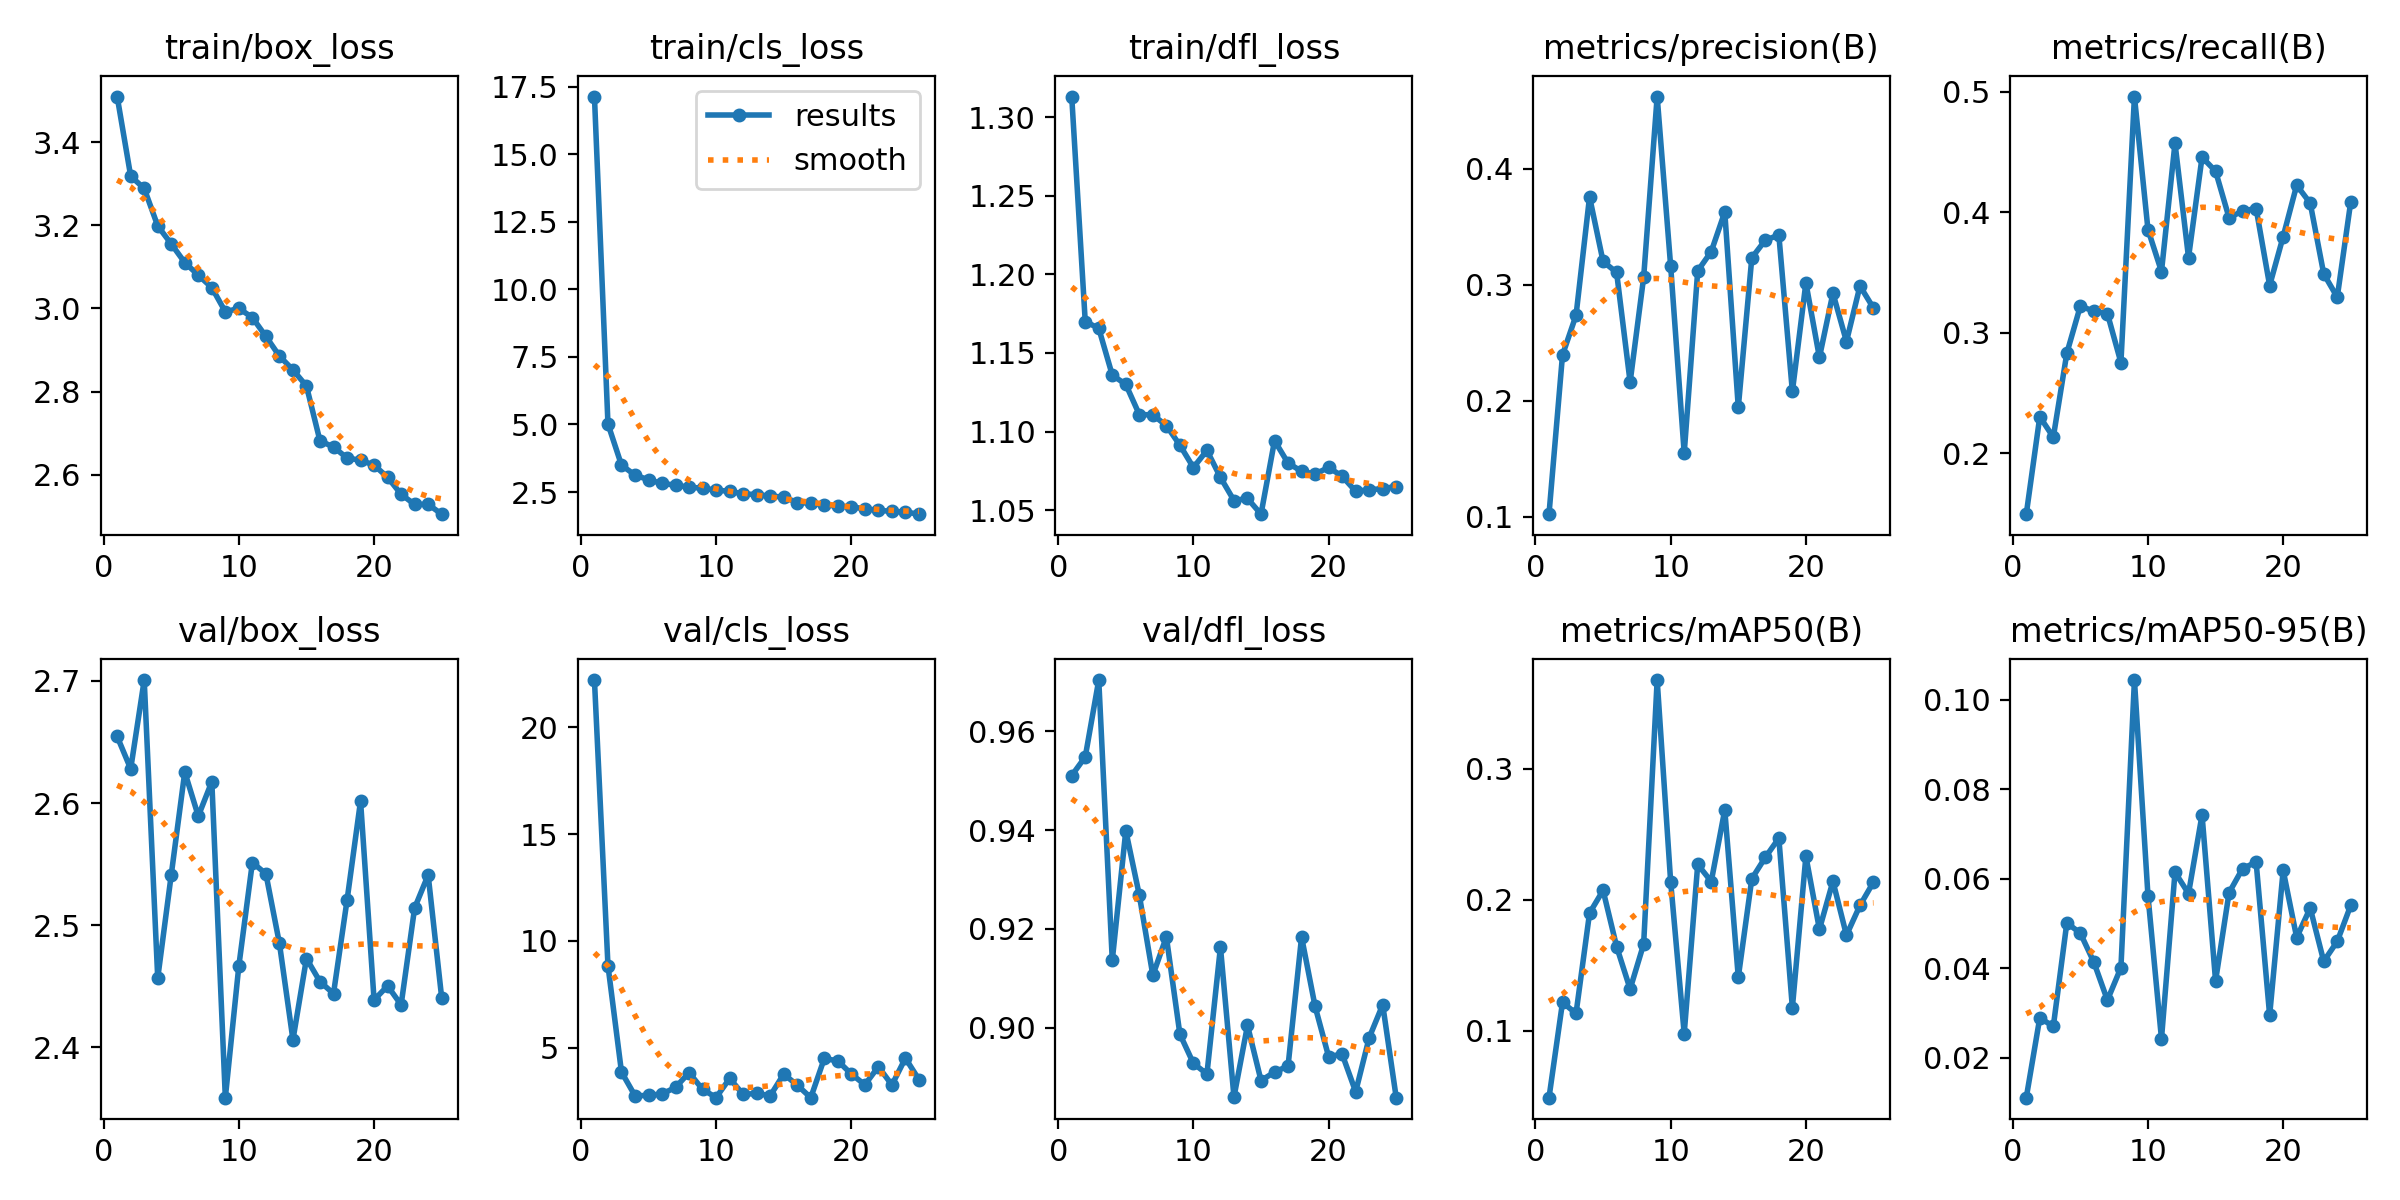

In [20]:
%cd {HOME}
Image(filename=f'{HOME}//runs/detect/train2/results.png', width=600)

/content


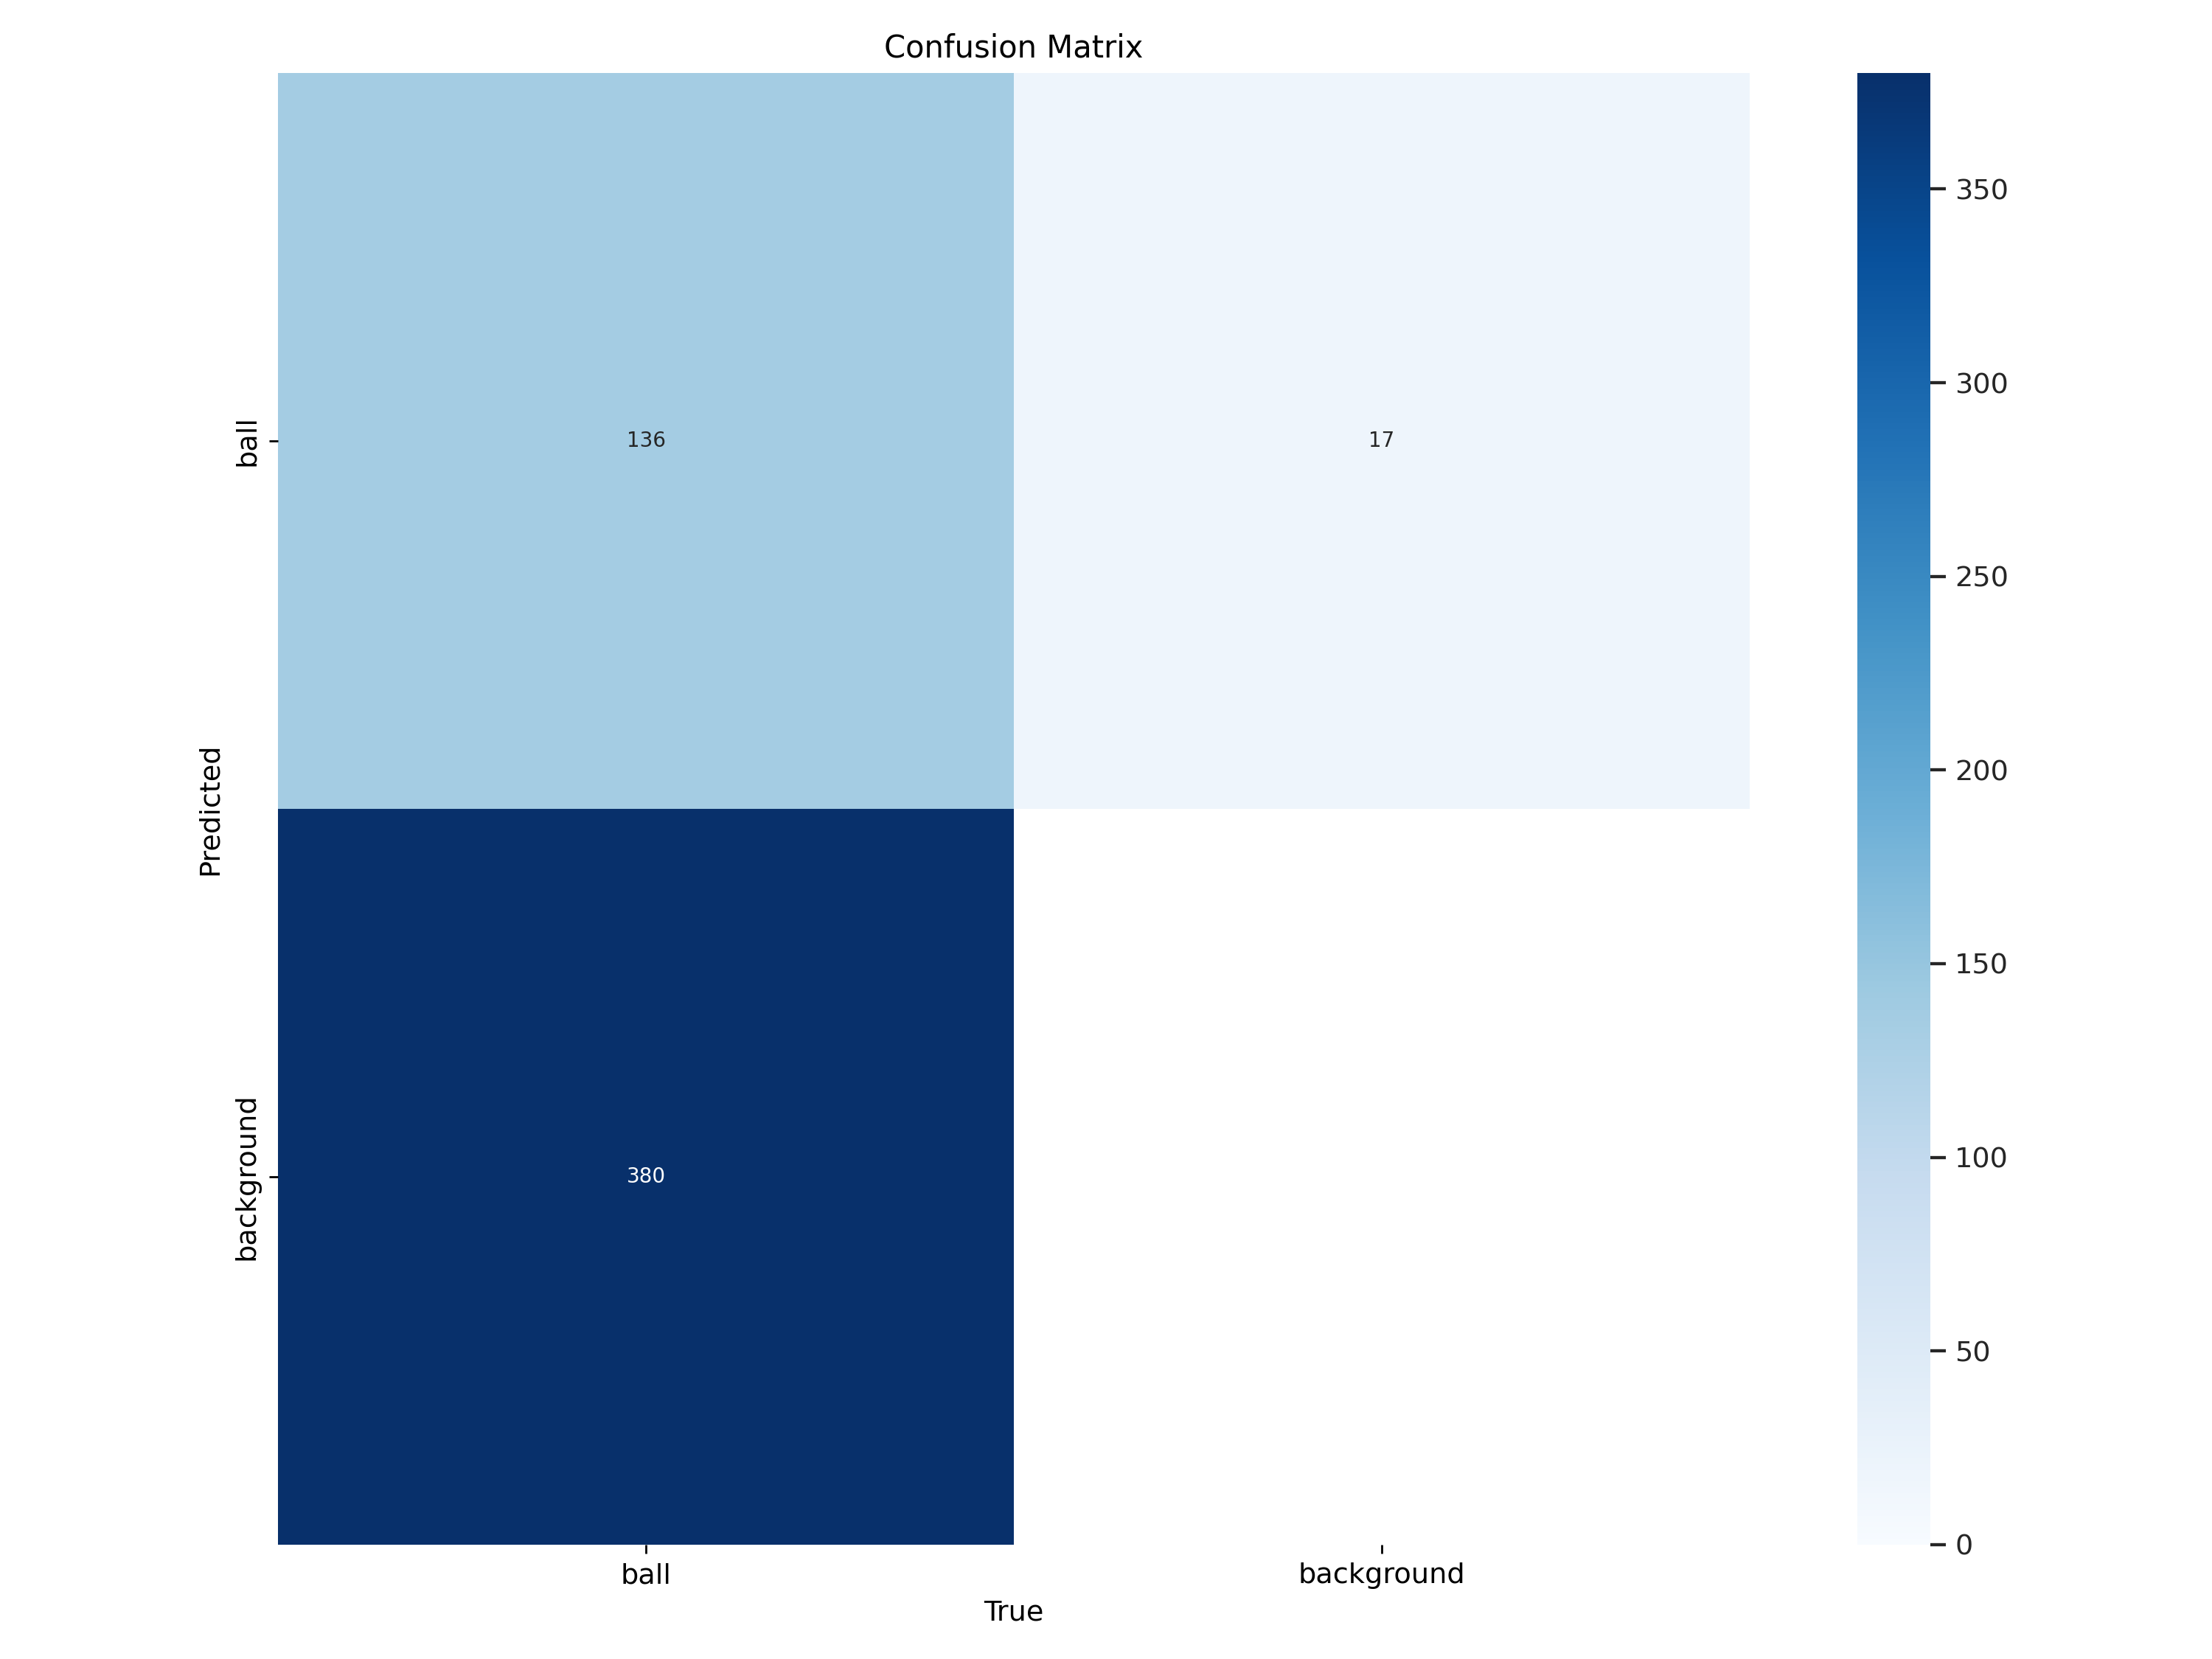

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


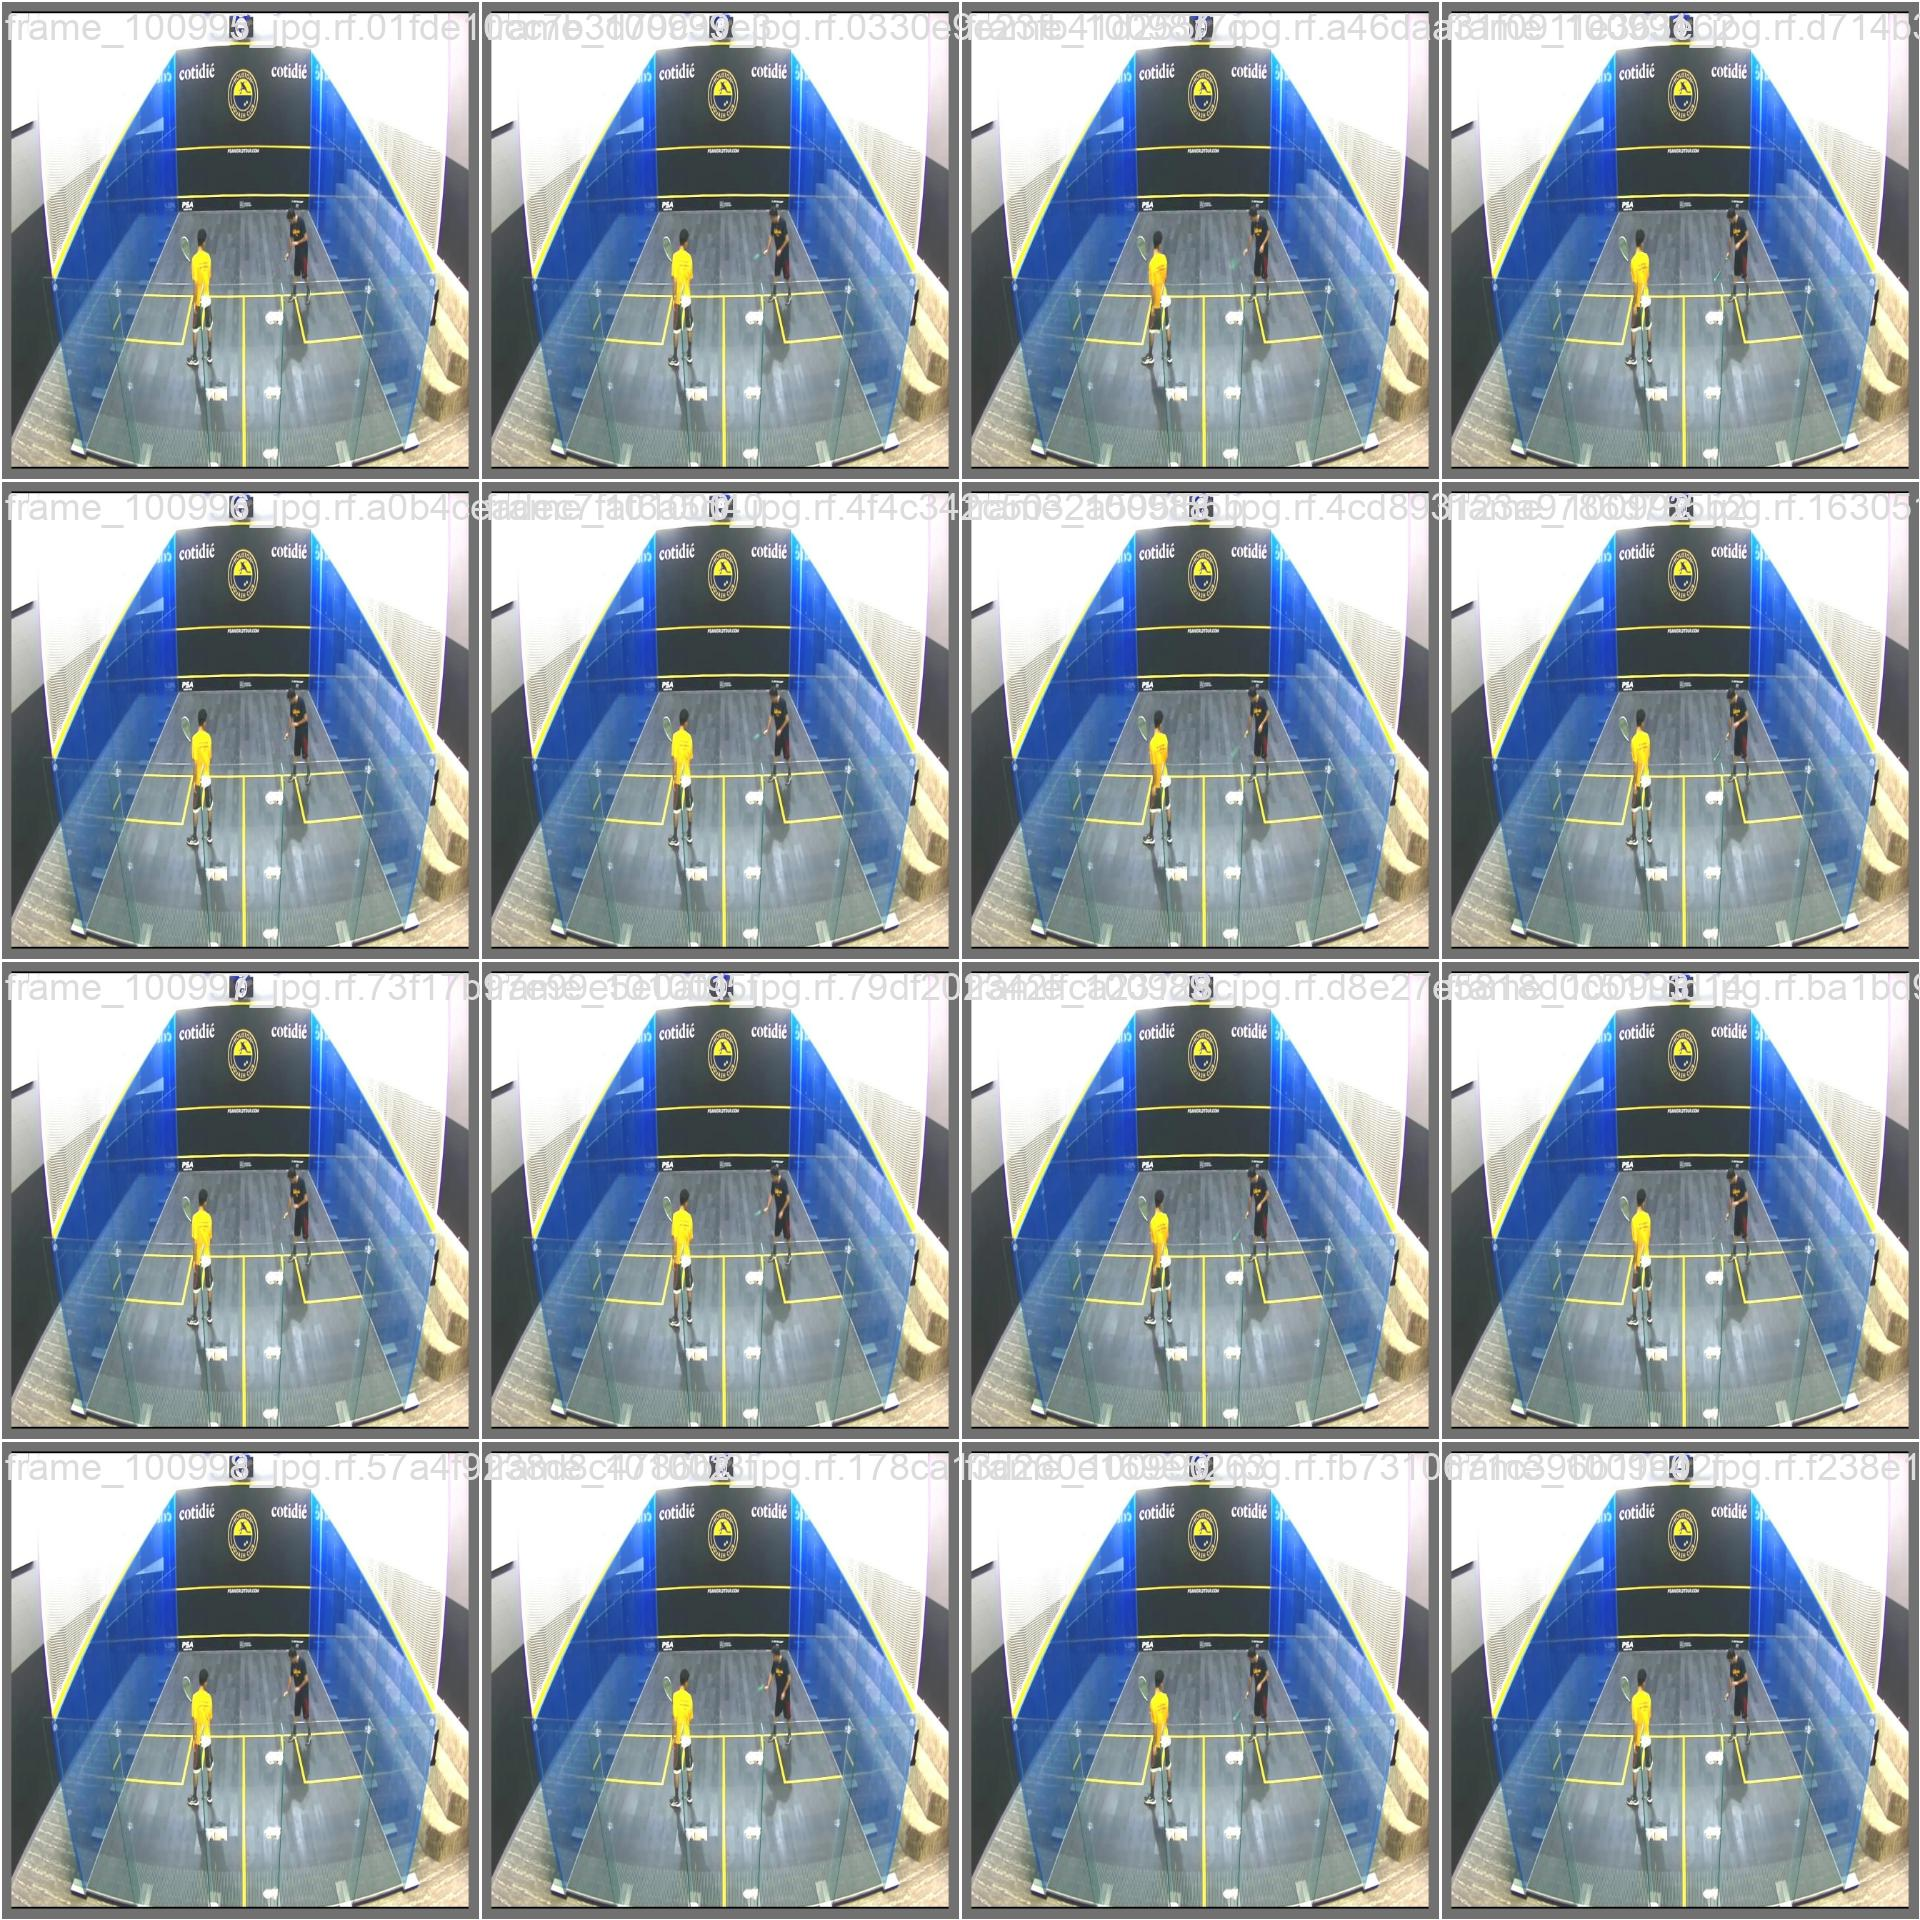

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

/content


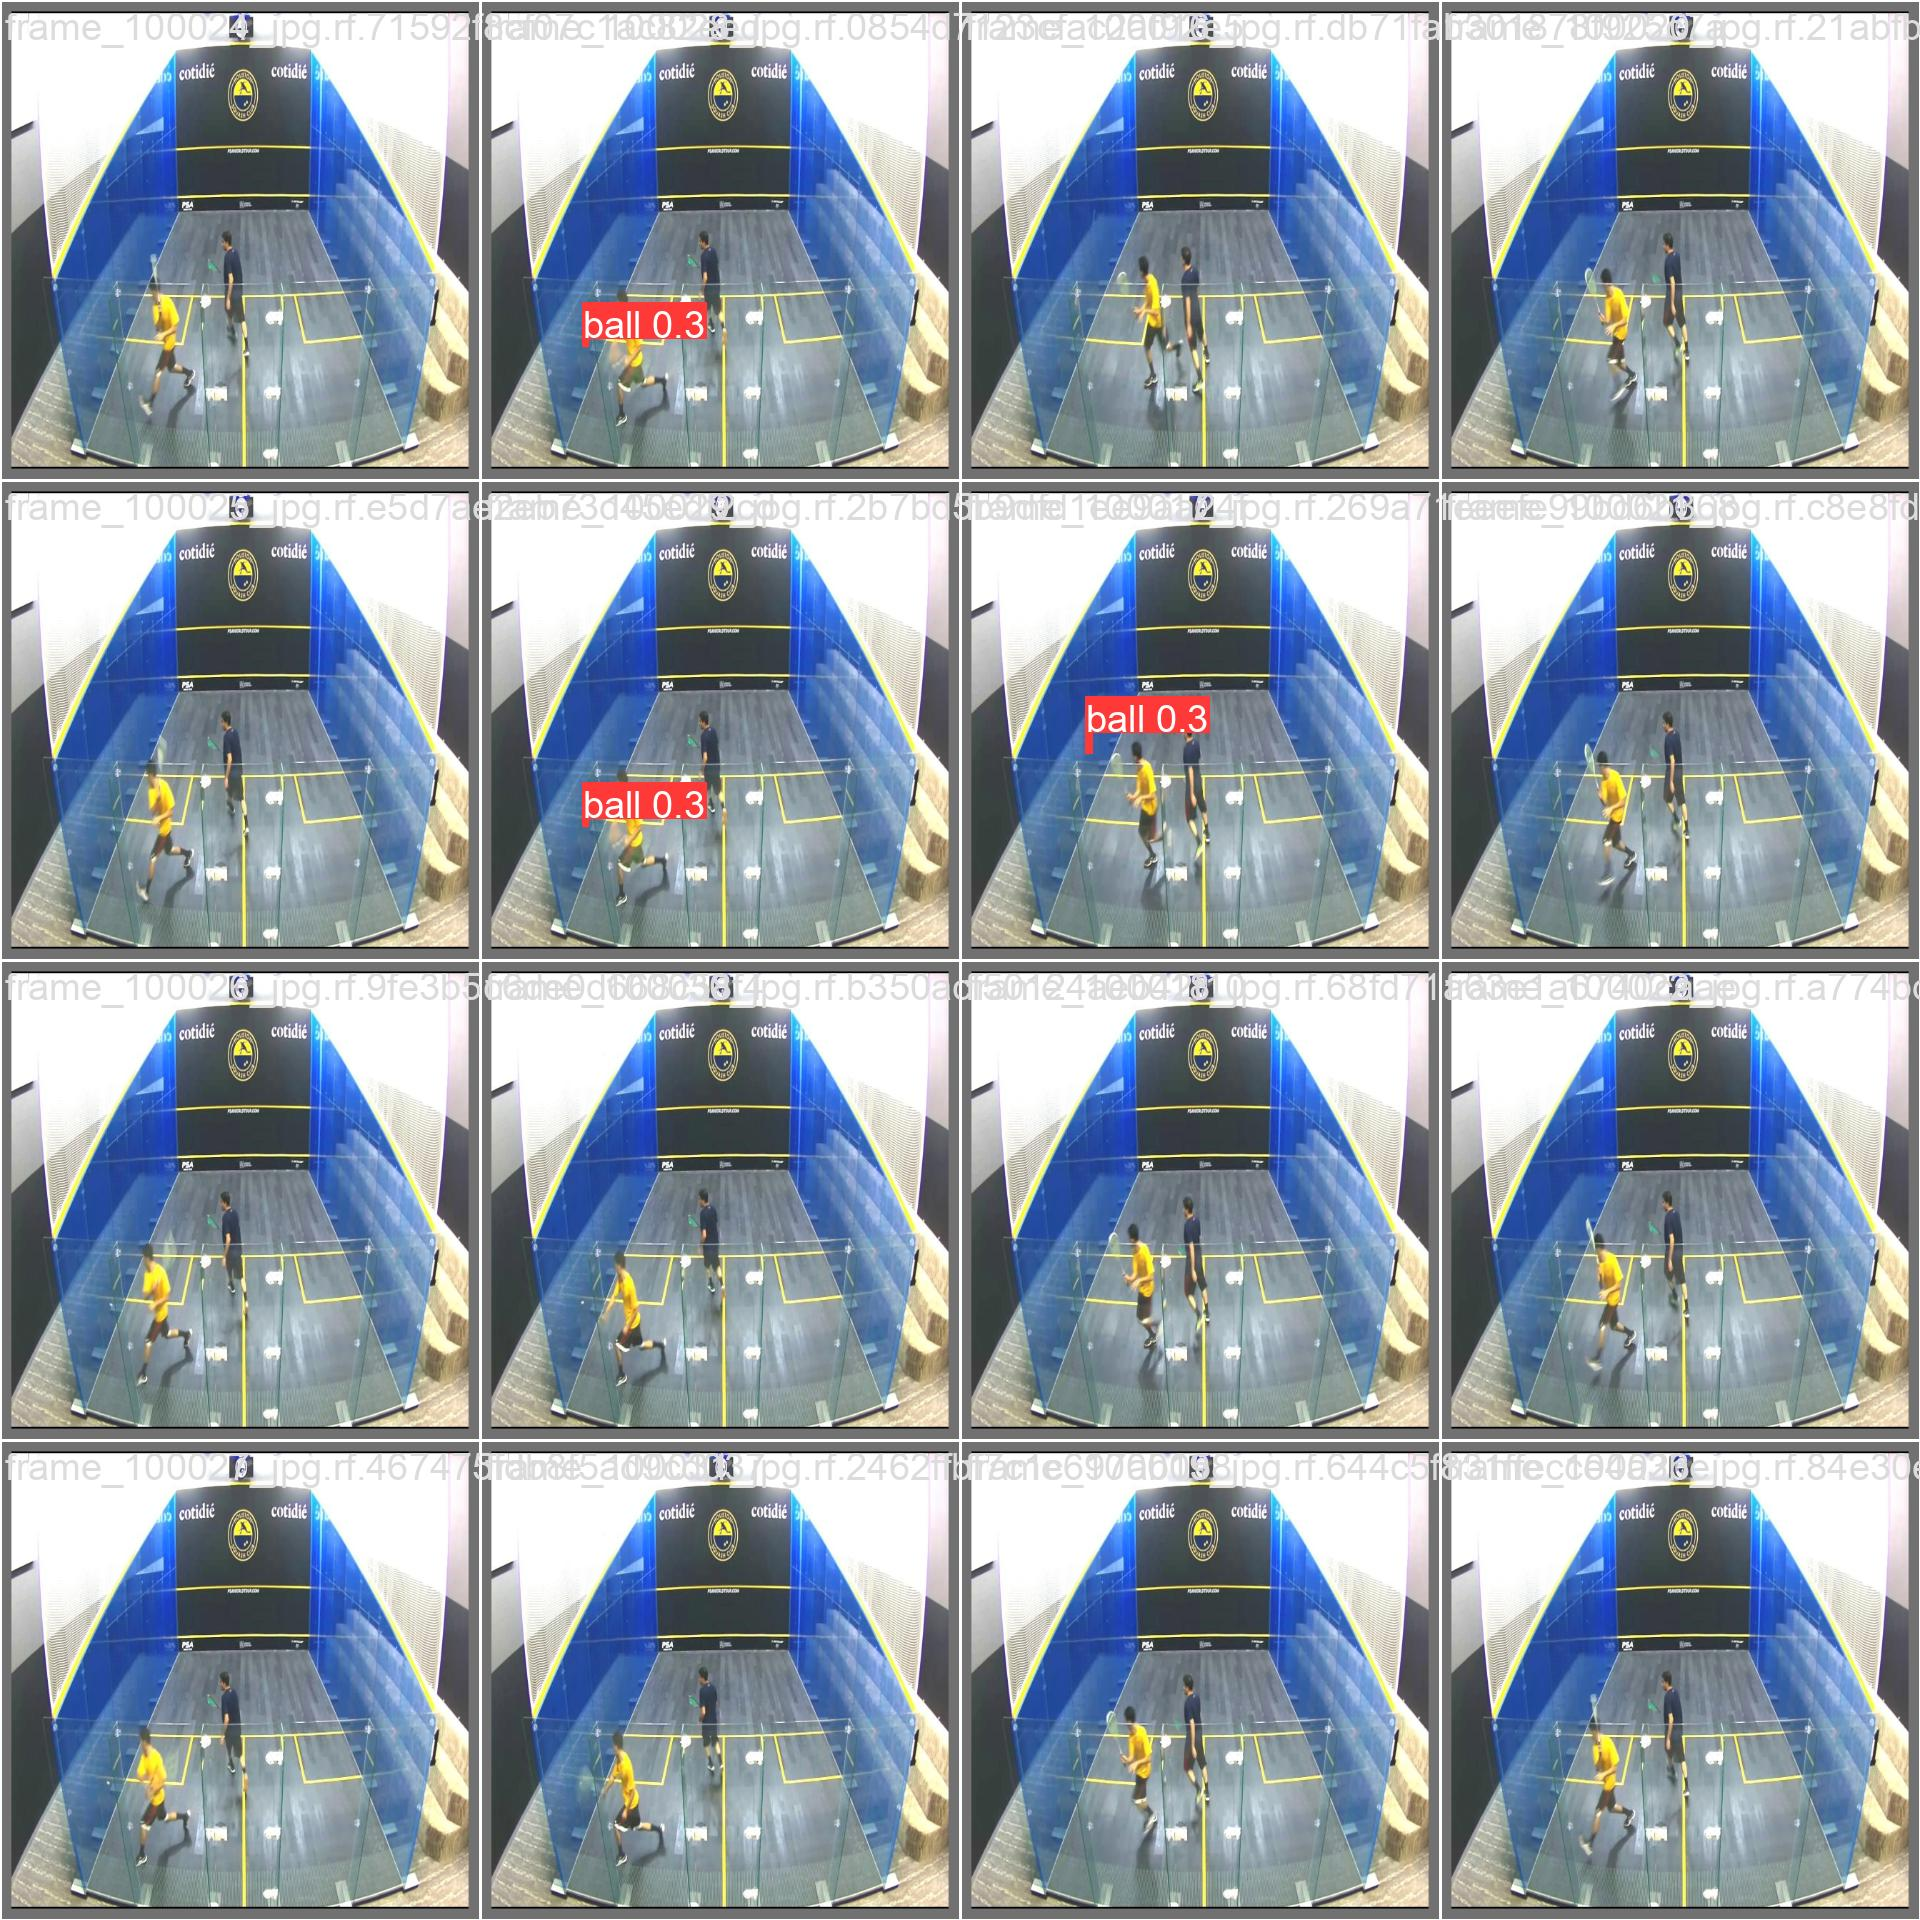

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch1_pred.jpg', width=600)

/content


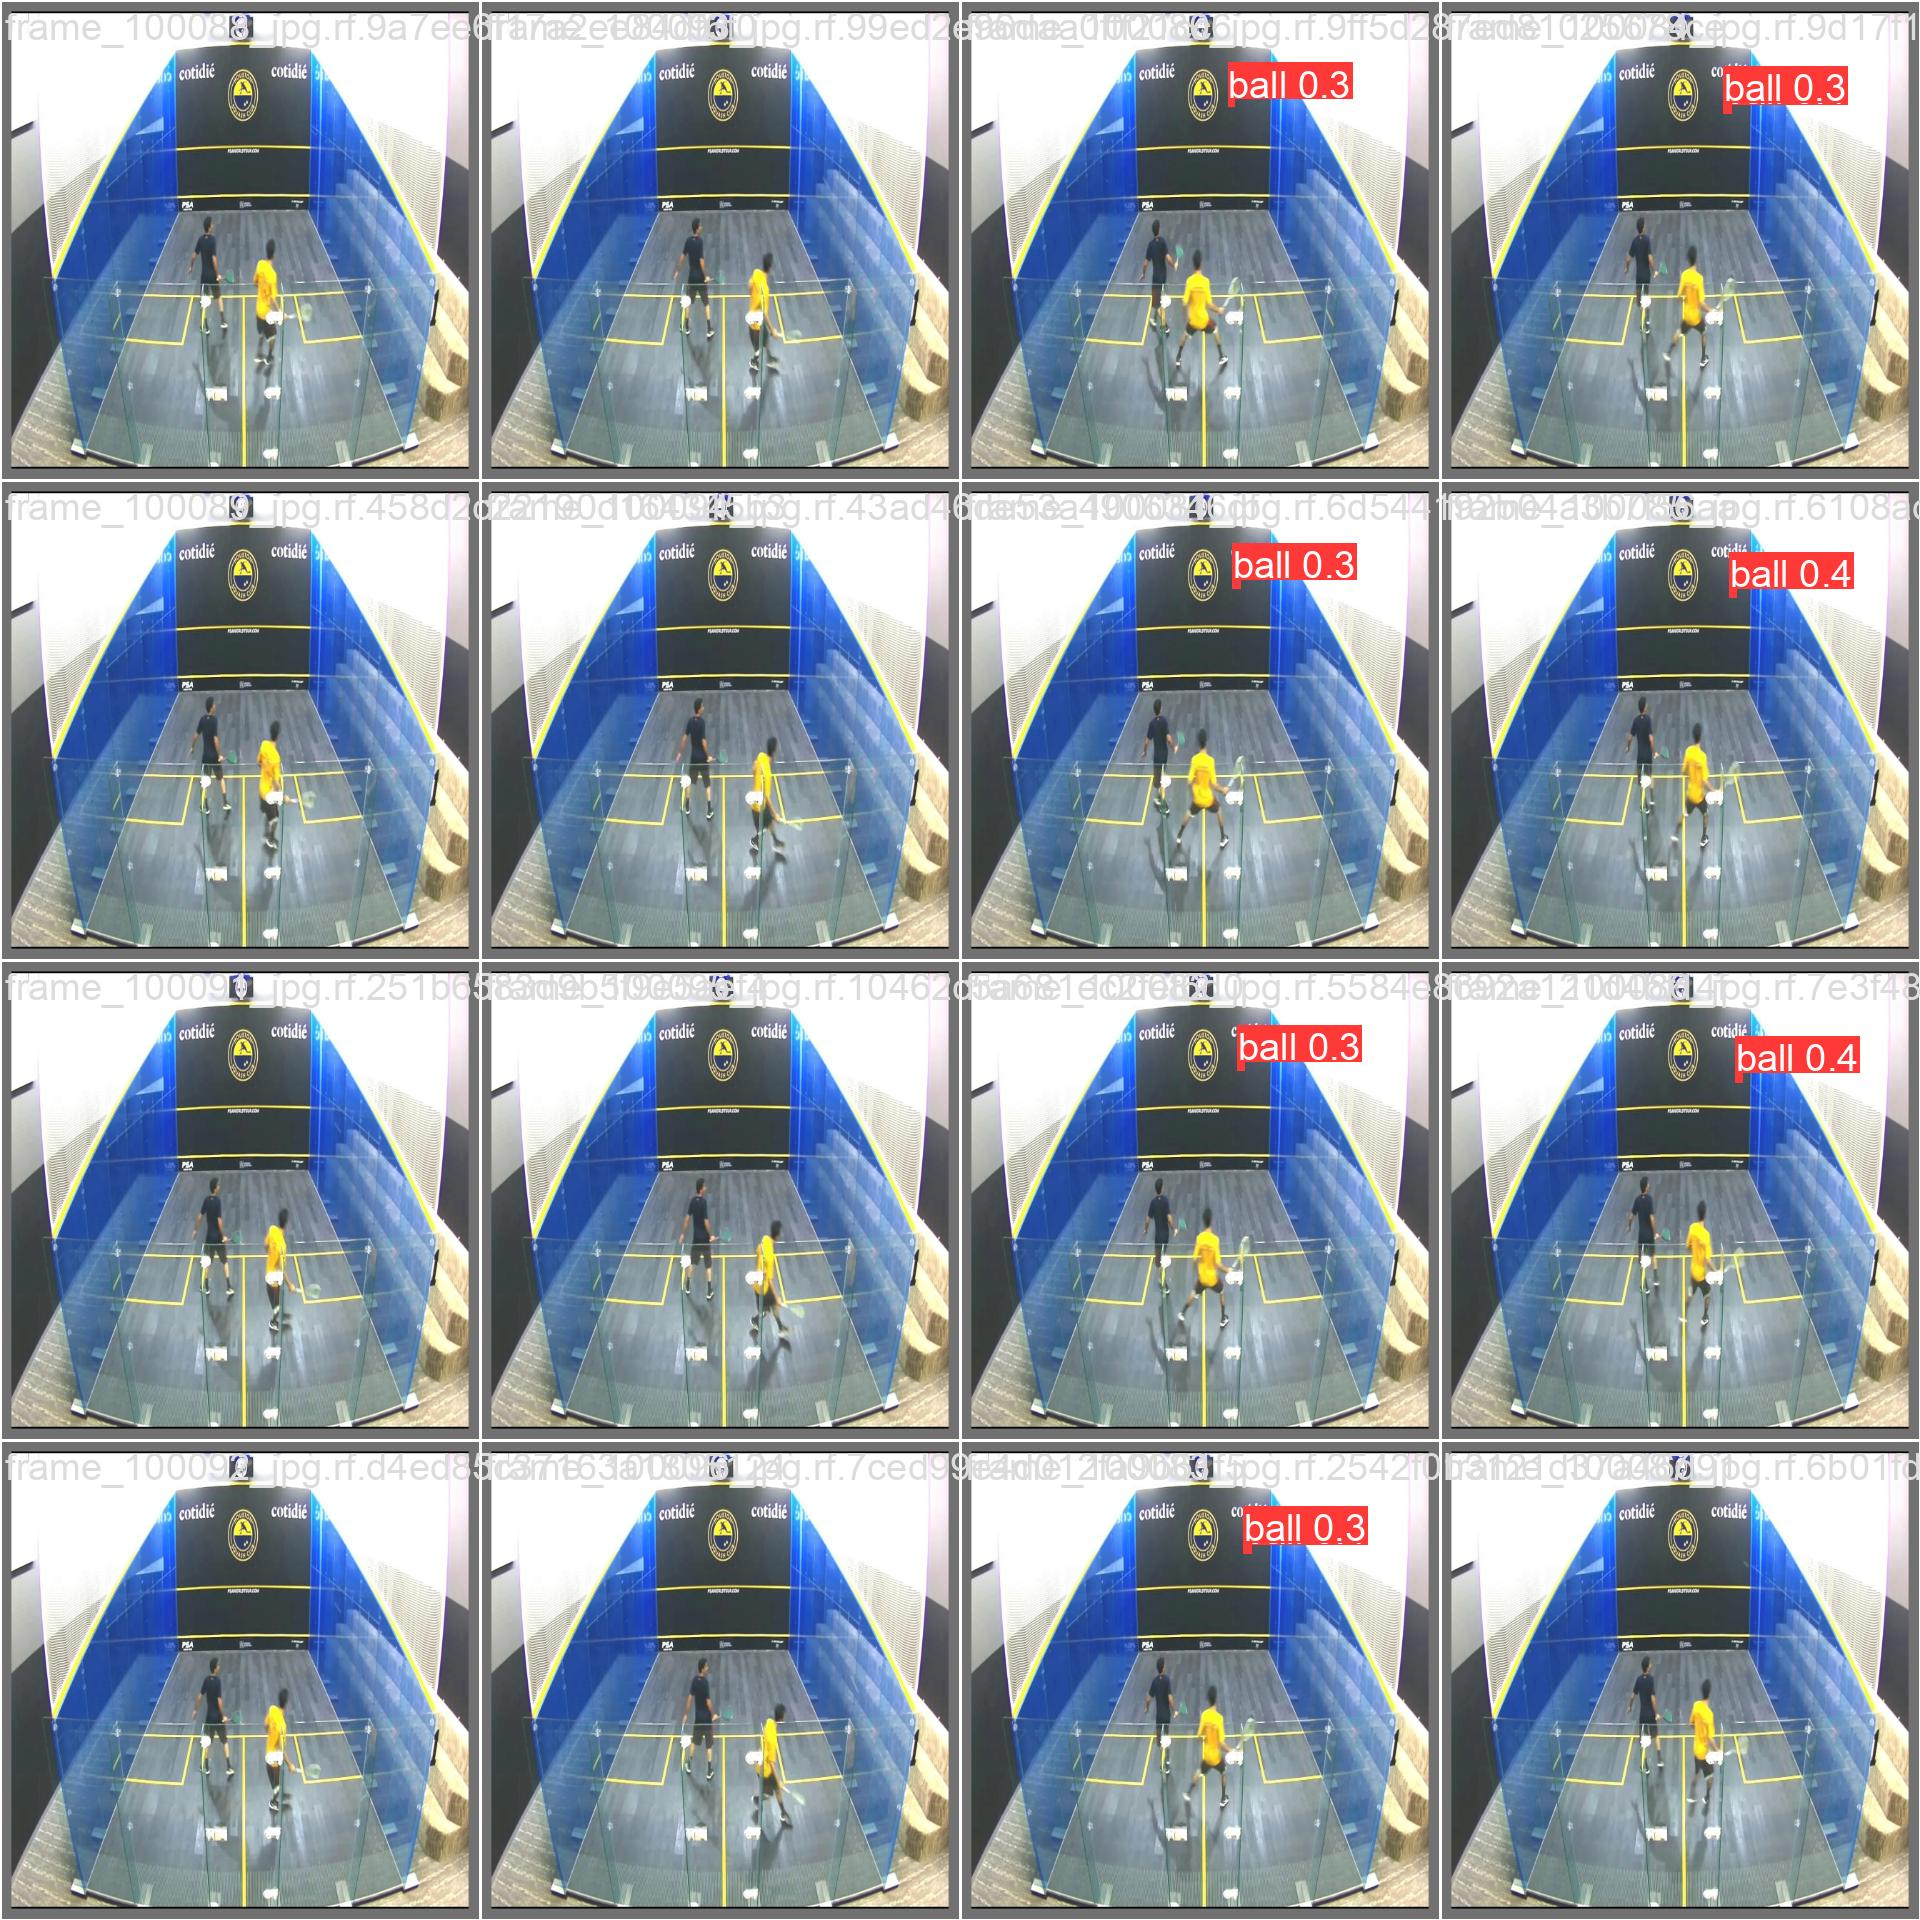

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch2_pred.jpg', width=600)

In [39]:
import shutil
import os

# Directory to zip
directory_to_zip = '/content/runs/detect/predict'

# Zip file path
zip_file_path = '/content/predictions.zip'

# Create a zip file
shutil.make_archive(zip_file_path.split('.')[0], 'zip', directory_to_zip)

# Download the zip file
from google.colab import files
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>